In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
df = pd.read_csv('sample_sets/sample-sales.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.head(1)

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51


In [ ]:
#QUESTION: display the total number of purchases and total sales for the top 10 customers

In [5]:
#my answer
top10=df.groupby('name').agg({'account number': 'count','ext price':'sum'}).sort_values(['ext price','account number'], ascending=False).head(10).reset_index()

In [6]:
top10.columns = ['client','sales','orders']

In [7]:
top10.head(1)

,client,sales,orders
0,Kulas Inc,137351.96,94


In [8]:
#different preset stylings available
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [11]:
plt.style.use('classic')

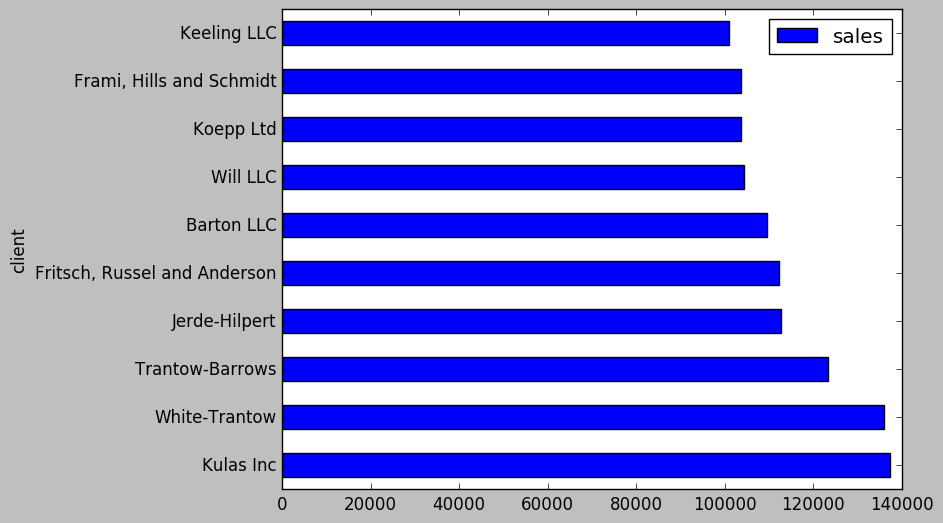

In [12]:
#now that we have selected a better preset styling, we can run basic plots to prototype our visualization
top10.plot(kind='barh',x='client',y='sales')

In [ ]:
#much of the time, we'll want to apply customizations to our plots, which will require an extra call to plt.subplots()
#this will give us access to the ax and fig objects where all of our customizations will be applied
fig, ax = plt.subplots()
top10.plot(kind='barh', y="sales", x="client", ax=ax)

In [ ]:
#suppose we wanted to change our x limits and edit the axis labels
fig, ax = plt.subplots()
top10.plot(kind='barh', y="sales", x="client", ax=ax)
ax.set_xlim([-5000,150000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer')

In [ ]:
#change the title, figsize, and x label
fig, ax = plt.subplots(figsize=(5, 6))
top10.plot(kind='barh', y="sales", x="client", ax=ax)
ax.set_xlim([0, 150000])
ax.set(title='2014 Revenue', xlabel='Total Revenue')
ax.legend().set_visible(False)

In [14]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

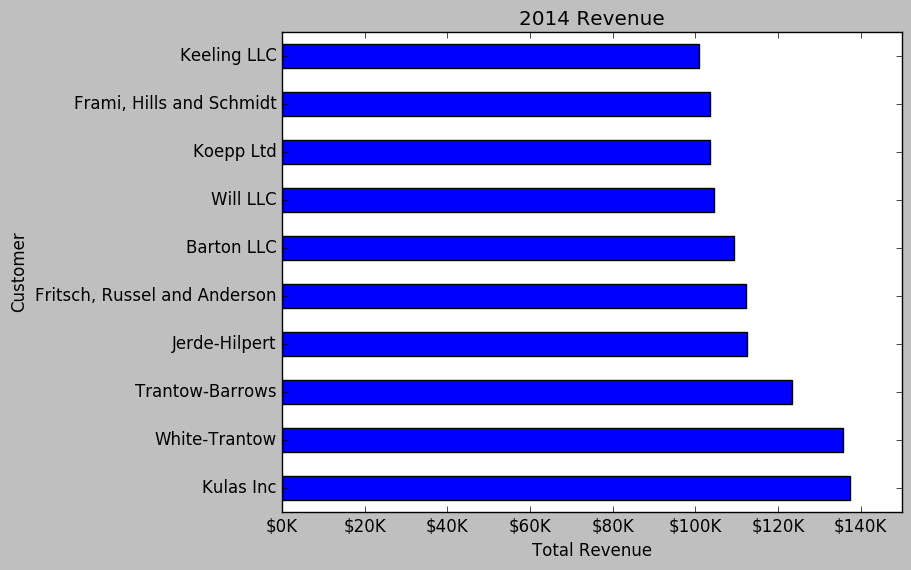

In [15]:
#we're getting closer, but the revenue figures are still a major eyesore
#to solve for this, we can use the function currency above in conjunction with FuncFormatter
#we can also change the y label
fig, ax = plt.subplots()
top10.plot(kind='barh', y="sales", x="client", ax=ax)
ax.set_xlim([0, 150000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

In [ ]:
#A final visualization may look like the following
#it is always good to think of ways to provide reference to the viewer
#here we will add an average line on our x axis for average revenue

fig, ax = plt.subplots()

# Plot the data and get the averaged
top10.plot(kind='barh', y="sales", x="client", ax=ax)
avg = top10['sales'].mean()

# Set limits and labels
ax.set_xlim([-5000, 150000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

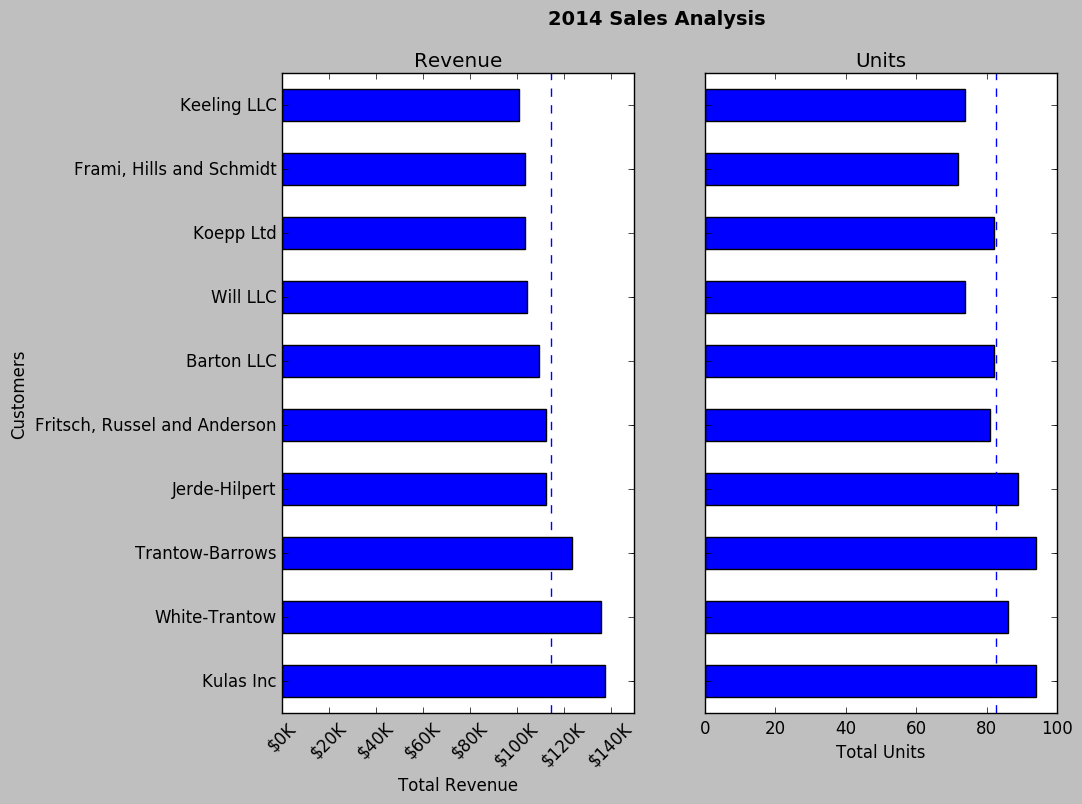

In [16]:
#often times, you'll want to create more than just one plot
#fig represents the entire visualization, while ax represents each individual plot
#you can overlap axis's or create multiple plots each visualizing different data
#here we'll want a side by side of orders and revenue


# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(10, 8))

#create the plot from above
top10.plot(kind='barh', y="sales", x="client", ax=ax0)
ax0.set_xlim([0, 150000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')
formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)
#x tick labels are mushed together so rotate them
for tick in ax0.get_xticklabels():
    tick.set_rotation(45)

# Plot the average as a vertical line
avg = top10['sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top10.plot(kind='barh', y="orders", x="client", ax=ax1)
avg = top10['orders'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

In [3]:
#reduce x ticks

df = pd.DataFrame([{'DATETIME': '2017-09-29 01:00,', 'Population': 1000},
                   {'DATETIME': '2017-09-29 02:00,', 'Population': 3000},
                   {'DATETIME': '2017-09-29 03:00,', 'Population': 4000},
                   {'DATETIME': '2017-09-29 04:00,', 'Population': 5000},
                   {'DATETIME': '2017-09-29 05:00,', 'Population': 7000},
                   {'DATETIME': '2017-09-29 06:00,', 'Population': 6000},
                   {'DATETIME': '2017-09-29 07:00,', 'Population': 5000},
                   {'DATETIME': '2017-09-29 08:00,', 'Population': 4000},
                   {'DATETIME': '2017-09-29 09:00,', 'Population': 4000},
                   {'DATETIME': '2017-09-29 10:00,', 'Population': 4000}])

In [4]:
df

,DATETIME,Population
0,"2017-09-29 01:00,",1000
1,"2017-09-29 02:00,",3000
2,"2017-09-29 03:00,",4000
3,"2017-09-29 04:00,",5000
4,"2017-09-29 05:00,",7000
5,"2017-09-29 06:00,",6000
6,"2017-09-29 07:00,",5000
7,"2017-09-29 08:00,",4000
8,"2017-09-29 09:00,",4000
9,"2017-09-29 10:00,",4000


AttributeError: 'unicode' object has no attribute 'set_rotation'

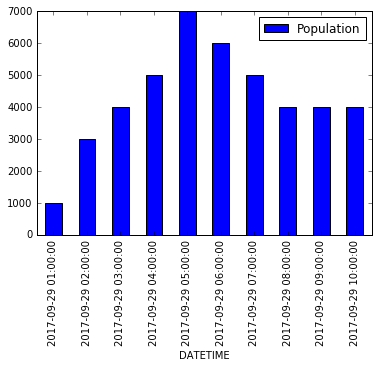

In [19]:
df.DATETIME = pd.to_datetime(df['DATETIME'])
fig, ax = plt.subplots()
df.plot(kind='bar', y="Population", x="DATETIME", ax=ax)
ticks = ax.xaxis.get_ticklocs()
ticks = [tick for i, tick in enumerate(ticks) if (i % 2 == 0)]
ticklabels = [l.get_text() for i, l in enumerate(ax.xaxis.get_ticklabels()) if (i % 2 == 0)]
for tick in ticklabels:
    tick.set_rotation(45)
print(ticklabels)
ax.xaxis.set_ticks(ticks)
ax.xaxis.set_ticklabels(ticklabels)  
plt.show()








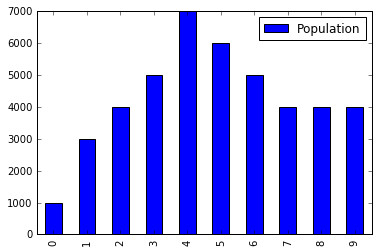

In [6]:
df.plot(kind='bar')